In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
import random
import time
from numpy.random import seed
from numpy.random import randint

## Hybridsort algo

In [2]:
def hybridSort(L,S): #input array L and threshold S as parameters
    size=len(L)
    kc=0
    if size>S: #merge
        if size>1: #minimum size array atleast two elements
            #divide into 2 equal sized sub arrays or problems
            #find solution to each of these sub problems
            L1 = L[:(size)//2]
            L2= L[size//2:]
            # aft split odd len, len(L1) < len(L2)
            if (len(L1) <= S):
                #switch to insertion sort
               kc+=insertion(L1)
            if (len(L2) <= S):
                kc+=insertion(L2)
            if (len(L1) > S):
                L1,keym = hybridSort(L1,S)
                kc+=keym
            if (len(L2) > S):
                L2, keym = hybridSort(L2,S)
                kc+=keym

            L,keys=merge(L1,L2)
            kc+=keys

        else:
            return
    else: # insertion
        kc+=insertion(L)
    return L,kc

def insertion(L):
    key_comparison = 0
    for i in range(1,len(L)):
        for j in range(i,0,-1):
            key_comparison += 1
            if L[j]<L[j-1]:
                L[j],L[j-1] = L[j-1],L[j]
            else:
                break
    return key_comparison

def merge(L1,L2):
    L=[] #temp arr to str sorted
    kc=0
    while (L1 != [] and L2 != []):
        kc+=1
        if(L1[0]<L2[0]):
            modifyArray(L,L1)
        elif(L2[0]<L1[0]):
            modifyArray(L,L2)
        else: #the 1st element of 2 halves are equal
            modifyArray(L,L1)
            modifyArray(L,L2)
    while (L1 != [] or L2 != []):
        if(L1==[]):
            modifyArray(L,L2)
        elif (L2==[]):
            modifyArray(L,L1)
    return L,kc

def modifyArray(L, arr):
    L.append(arr[0])
    arr.remove(arr[0])

## Original mergesort

In [3]:
def origMerge(L1,L2):
    L=[] #temp arr to str sorted
    kc=0
    if (type(L1) is tuple):
        L1,keys=L1
        kc+=keys
    if (type(L2) is tuple):
        L2,keys=L2
        kc+=keys

    while (L1 != [] and L2 != []):
        kc+=1
        if(L1[0]<L2[0]):
            modifyArray(L,L1)
        elif(L2[0]<L1[0]):
            modifyArray(L,L2)
        else: #the 1st element of 2 halves are equal
            modifyArray(L,L1)
            modifyArray(L,L2)
    while (L1 != [] or L2 != []):
        if(L1==[]):
            modifyArray(L,L2)
        elif (L2==[]):
            modifyArray(L,L1)
    return L,kc

def origMergeSort(L):
    mid = (len(L)-1)//2 #index to split at
    if (len(L)==0 or len(L)==1):
        return L,0
    else:
        x1 =  origMergeSort(L[:(mid+1)])
        x2 =  origMergeSort(L[(mid+1):])

    L,kc= origMerge(x1,x2)

    return L,kc

## Comparing graphs

Text(0.5, 1.0, 'Merge Sort')

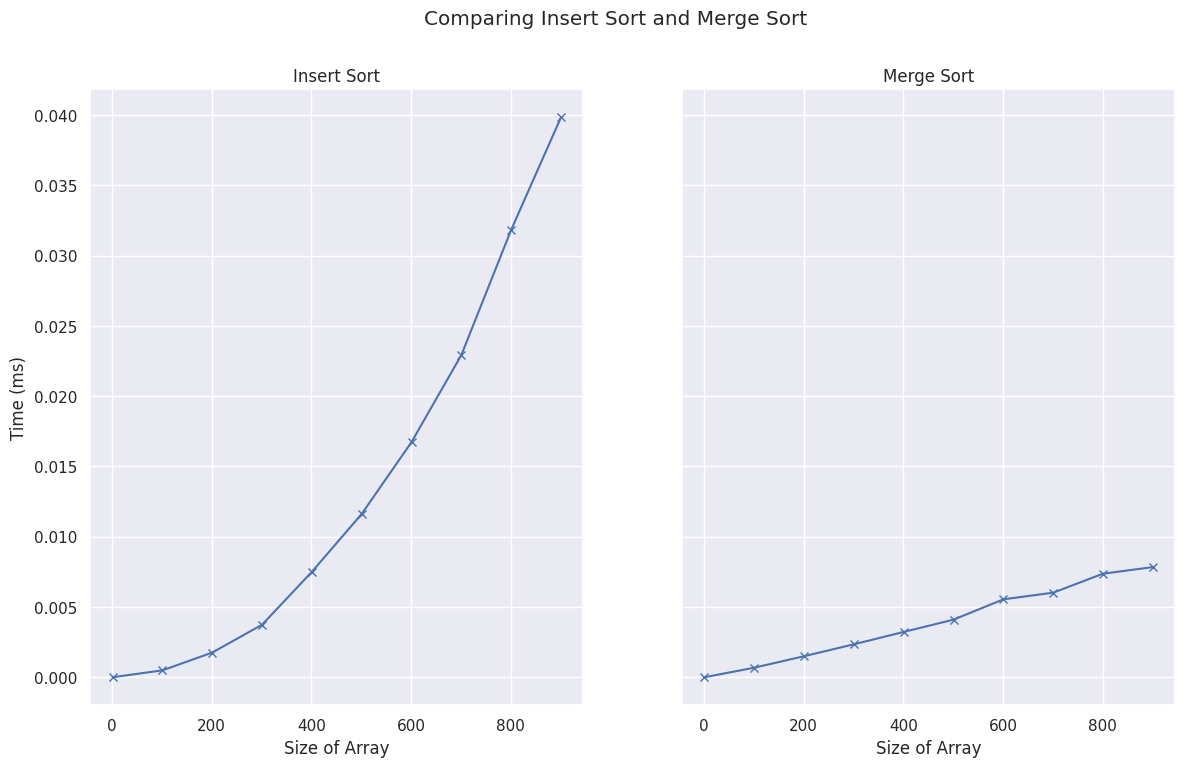

In [11]:
#compare insertion vs mergesort time complexity
threshold = 5  # Set your threshold here
def graph(algo):
    finalkc =[]
    finaltime =[]
    arrsize = []
    for i in range(1,1000,100):
        arr = [random.randint(1, 100) for _ in range(i)]

        start_time = time.time()
        if (type(algo(arr)) is tuple):
            key_comparisons = algo(arr)[1]
        else:
            key_comparisons = algo(arr)
        end_time = time.time()
        cpu_time_used = end_time - start_time
        #print(f"Size: {i}, Key Comparisons: {key_comparisons}, Time: {cpu_time_used} seconds")
        finalkc.append(key_comparisons)
        finaltime.append(cpu_time_used) 
        arrsize.append(i)
    return arrsize, finalkc, finaltime


fig, ax1 = plt.subplots(1, 2, figsize=(14,8), sharey=True)

fig.suptitle("Comparing Insert Sort and Merge Sort")

ax1[0].plot(graph(insertion)[0],graph(insertion)[2], 'x-')
ax1[0].set_ylabel('Time (ms)')
ax1[0].set_xlabel('Size of Array')
ax1[0].set_title('Insert Sort')

ax1[1].plot(graph(origMergeSort)[0],graph(origMergeSort)[2], 'x-')
ax1[1].set_xlabel('Size of Array')
ax1[1].set_title('Merge Sort')

Worse case time complexity for insertion sort is O(n^2) while mergesort is O(nlgn) hence the graph's results matches with the theoretical analysis of the time complexity.

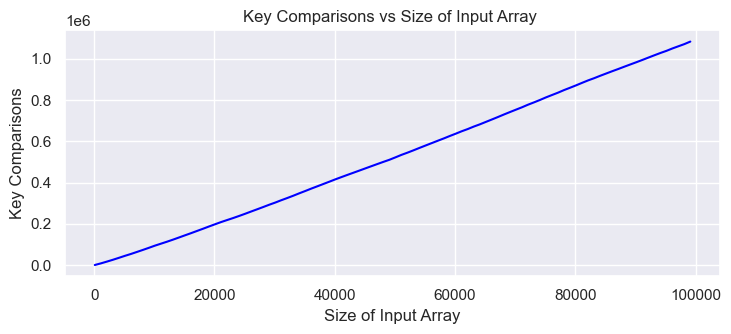

In [19]:
#With the value of S fixed, plot the number of key comparisons over different sizes of the input list n.
threshold = 5  # Set your threshold here
finaly =[]
finalx =[]
for i in range(100,100000,1000):
    arr = [random.randint(1, 100) for _ in range(i)]

    start_time = time.time()
    key_comparisons = hybridSort(arr,threshold)[1]
    end_time = time.time()
    cpu_time_used = end_time - start_time
    #print(f"Size: {i}, Key Comparisons: {key_comparisons}, Time: {cpu_time_used} seconds")
    finaly.append(key_comparisons) 
    finalx.append(i)

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = np.array(finalx)
y = np.array(finaly)

plt.title("Key Comparisons vs Size of Input Array ")
plt.ylabel("Key Comparisons")
plt.xlabel("Size of Input Array")
plt.plot(x, y, color="blue")

plt.show()

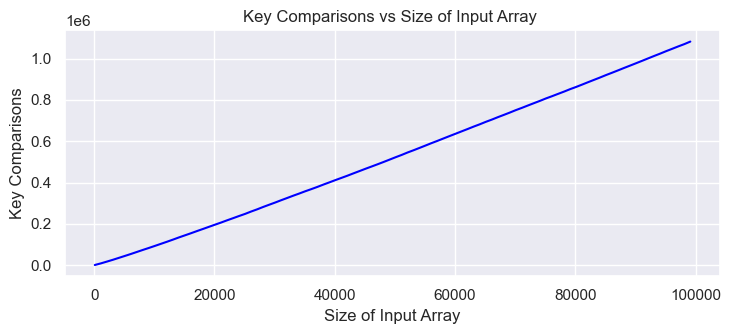

In [20]:
#With the value of S fixed, plot the number of key comparisons over different sizes of the input list n.
threshold = 4  # Set your threshold here
finaly =[]
finalx =[]
for i in range(100,100000,1000):
    arr = [random.randint(1, 100) for _ in range(i)]

    start_time = time.time()
    key_comparisons = hybridSort(arr,threshold)[1]
    end_time = time.time()
    cpu_time_used = end_time - start_time
    #print(f"Size: {i}, Key Comparisons: {key_comparisons}, Time: {cpu_time_used} seconds")
    finaly.append(key_comparisons) 
    finalx.append(i)

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = np.array(finalx)
y = np.array(finaly)

plt.title("Key Comparisons vs Size of Input Array ")
plt.ylabel("Key Comparisons")
plt.xlabel("Size of Input Array")
plt.plot(x, y, color="blue")

plt.show()

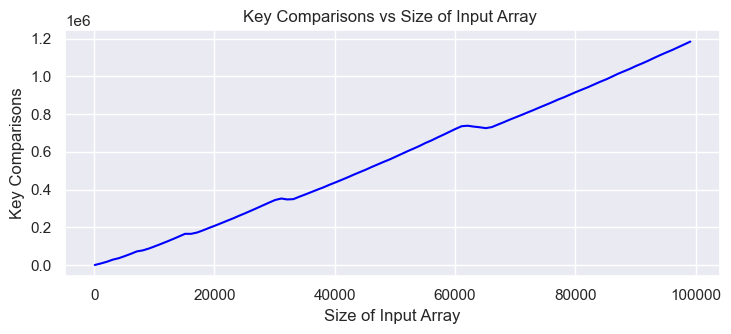

In [22]:
#With the value of S fixed, plot the number of key comparisons over different sizes of the input list n.
threshold = 15  # Set your threshold here
finaly =[]
finalx =[]
for i in range(100,100000,1000):
    arr = [random.randint(1, 100) for _ in range(i)]

    start_time = time.time()
    key_comparisons = hybridSort(arr,threshold)[1]
    end_time = time.time()
    cpu_time_used = end_time - start_time
    #print(f"Size: {i}, Key Comparisons: {key_comparisons}, Time: {cpu_time_used} seconds")
    finaly.append(key_comparisons) 
    finalx.append(i)

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = np.array(finalx)
y = np.array(finaly)

plt.title("Key Comparisons vs Size of Input Array ")
plt.ylabel("Key Comparisons")
plt.xlabel("Size of Input Array")
plt.plot(x, y, color="blue")

plt.show()

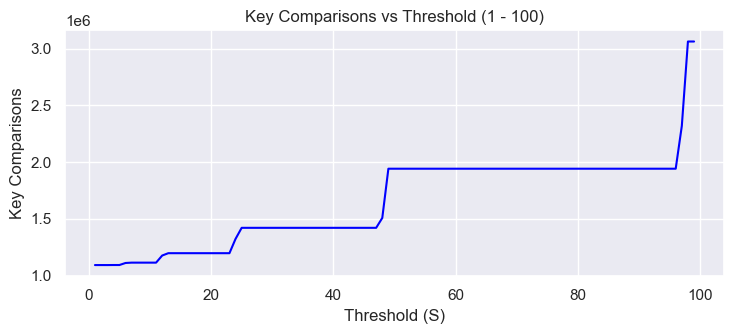

In [9]:
#With the input size setuptools fixed, plot the number of key comparisons over different values of S.
I = randint(1, 100, 100000)
arr = list(I)
finaly =[]
finalx =[]
for i in range(1,100):
    threshold = i
    start_time = time.time()
    key_comparisons = hybridSort(arr,threshold)[1]
    end_time = time.time()
    cpu_time_used = end_time - start_time
    #print(f"Threshold S: {i}, Key Comparisons: {key_comparisons}, Time: {cpu_time_used} seconds")
    finaly.append(key_comparisons)
    finalx.append(i)
    
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = np.array(finalx)
y = np.array(finaly)

plt.title("Key Comparisons vs Threshold (1 - 100)")
plt.ylabel("Key Comparisons")
plt.xlabel("Threshold (S)")
plt.plot(x, y, color="blue")

plt.show()

In [ ]:
#With the input size setuptools fixed, plot the number of key comparisons over different values of S.
I = randint(1, 100, 100000)
arr = list(I)
finaly =[]
finalx =[]
for i in range(1,10):
    threshold = i
    start_time = time.time()
    key_comparisons = hybridSort(arr,threshold)[1]
    end_time = time.time()
    cpu_time_used = end_time - start_time
    #print(f"Threshold S: {i}, Key Comparisons: {key_comparisons}, Time: {cpu_time_used} seconds")
    finaly.append(key_comparisons)
    finalx.append(i)
    
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = np.array(finalx)
y = np.array(finaly)

plt.title("Key Comparisons vs Threshold (1 - 100)")
plt.ylabel("Key Comparisons")
plt.xlabel("Threshold (S)")
plt.plot(x, y, color="blue")

plt.show()